# Финансовый телеграм бот
Проект посвящен созданию полноценного телеграм бота

# Список использованных технологий:
1. pandas
2. Веб-скрепинг
3. API
4. Визуализация данных
5. Математические возможности питон
6. SQL
7. Регулярные выражения

Длина кода - немного больше 300 строк.

# Возможности бота:
1. Показывает финансовые новости
2. Присылает графики движения цены акции
3. Показывает курсы валют
4. Собирает портфель и показывает его динамику

@Stock_exchangebot - можете запустить все ячейки и понажимать

# Скачаем необходимые пакеты:

In [5]:
import telebot  # pip install PyTelegramBotAPI#
from telebot import types
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import time
from pandas_datareader import data
import matplotlib.pyplot as plt
import re
import sqlite3 as sql
import yfinance as yf #pip install yfinance
import drawSvg as draw #pip install drawSvg #к сожалению, pycharm не поддерживает этот пакет, поэтому не пытайтесь
#там запускать


ModuleNotFoundError: No module named 'drawSvg'

# Подключаемся к боту по токену и создаем ему начальные клавиатуры

Перед тем как запустить, не забудьте включить VPN

In [2]:
token = "1180947181:AAF9ocVFEsLFiITAFD1UHUZTEwUayIxzhiI"
bot = telebot.TeleBot(token)
keyboard1 = telebot.types.ReplyKeyboardMarkup(resize_keyboard=True)
keyboard1.row('Новости', "Котировки")
keyboard1.row('Портфель', 'Курс валют')
keyboard2 = telebot.types.ReplyKeyboardMarkup(resize_keyboard=True)
keyboard2.row('Собрать портфель', 'Посмотреть динамику')
keyboard3 = telebot.types.ReplyKeyboardMarkup(resize_keyboard=True)
keyboard3.row('РБК', 'ТАСС')
keyboard3.row('Интерфакс')
keyboard3.row('На главную')
keyboard_rbk = telebot.types.ReplyKeyboardMarkup(resize_keyboard=True)
keyboard_rbk.row('Экономика', 'Финансы')
keyboard_rbk.row('На главную')


# Ниже идут необходимые функции бота:
Функция, которая по нажатию на кнопку "Курс валют", скаичвает по API актуальные курсы 4 валют: доллара, рубля, фунта и йены и строит красивый график на котором можно посмотреть курс валюты относительно любой другой, используя drawSvg. Тут нет курса евро, так как при его запросе через цикл возникает ошибка и пофиксить не получилось, а других адекватных api, которые бы давали возможность бесплатно менять базовую валюту не нашел. 

In [3]:
def currency_rates(message):
    bot.send_message(message.from_user.id, "Подождите, обновляю курсы")
    # отступ для того, чтобы было место где подписать валюты
    indent = 30
    #размер клетки
    cell = 100
    
    currencys = ["USD", "GBP", "RUB", "JPY"]
    url = "https://api.exchangeratesapi.io/latest"
    #размер поля рисования
    size = (cell * 4) + indent
    
    d = draw.Drawing(size, size, displayInline=True)
    #основной квадрат
    d.append(draw.Rectangle(indent, 0, size - indent, size - indent, fill='pink'))

    for i in range(0, 5):
        d.append(draw.Line(indent, i * cell, size, i * cell, stroke='black'))
        d.append(draw.Line(indent + i * cell, 0, indent + i * cell, size - indent, stroke='black'))
    for i in range(0, 8):
        if i < 4:
            d.append(draw.Line(indent, (i + 1) * cell, (i + 1) * cell + indent, 0, stroke='black'))
        else:
            d.append(draw.Line(indent + (i - 4) * cell, size - indent, size, (i - 4) * cell, stroke='black'))
    for i in range(0, 4):
        d.append(draw.Rectangle(i * cell + indent, size - indent - (i + 1) * cell, cell, cell))
        d.append(draw.Text(currencys[i], 12, 0, size - indent - cell * (i + 1) + cell / 2, 0))
        d.append(draw.Text(currencys[i], 12, 70 + i * cell, size - 25, 0))
    a = []
    for base in currencys:
        b = []
        for currency in currencys:
            params = {'base': base}
            r = requests.get(url, params)
            b.append(str(round(r.json()['rates'][currency], 3)))
        a.append(b)
    for i in range(0, 4):
        for j in range(0, 4):
            d.append(draw.Text(a[i][j], 12, 60 + j * cell, size - indent - cell * (i + 1) + 10))
            d.append(draw.Text(a[i][j], 12, 60 + i * cell, size - indent - cell * (j + 1) + 80))
    d.savePng('exchange.png')
    exchange_rate = open("exchange.png", 'rb')

    bot.send_photo(message.from_user.id, exchange_rate, reply_markup=keyboard1)

Ниже скопировал код, который рисует картинку с валютами, чтобы понятно было как она выглядит. Эту часть не учитывал при подсчете длины кода

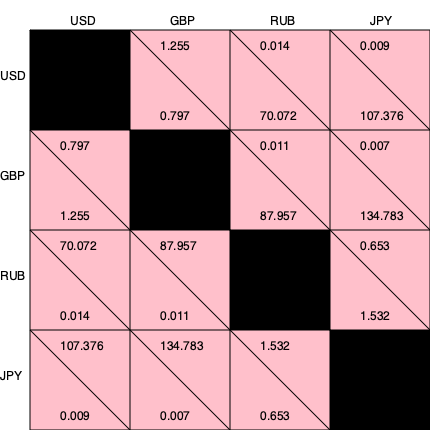

In [17]:
# отступ для того, чтобы было место где подписать валюты
indent = 30
#размер клетки
cell = 100
    
currencys = ["USD", "GBP", "RUB", "JPY"]
url = "https://api.exchangeratesapi.io/latest"
#размер поля рисования
size = (cell * 4) + indent
    
d = draw.Drawing(size, size, displayInline=True)
#основной квадрат
d.append(draw.Rectangle(indent, 0, size - indent, size - indent, fill='pink'))

for i in range(0, 5):
    d.append(draw.Line(indent, i * cell, size, i * cell, stroke='black'))
    d.append(draw.Line(indent + i * cell, 0, indent + i * cell, size - indent, stroke='black'))
for i in range(0, 8):
    if i < 4:
        d.append(draw.Line(indent, (i + 1) * cell, (i + 1) * cell + indent, 0, stroke='black'))
    else:
        d.append(draw.Line(indent + (i - 4) * cell, size - indent, size, (i - 4) * cell, stroke='black'))
for i in range(0, 4):
    d.append(draw.Rectangle(i * cell + indent, size - indent - (i + 1) * cell, cell, cell))
    d.append(draw.Text(currencys[i], 12, 0, size - indent - cell * (i + 1) + cell / 2, 0))
    d.append(draw.Text(currencys[i], 12, 70 + i * cell, size - 25, 0))
a = []
for base in currencys:
    b = []
    for currency in currencys:
        params = {'base': base}
        r = requests.get(url, params)
        b.append(str(round(r.json()['rates'][currency], 3)))
    a.append(b)
for i in range(0, 4):
    for j in range(0, 4):
        d.append(draw.Text(a[i][j], 12, 60 + j * cell, size - indent - cell * (i + 1) + 10))
        d.append(draw.Text(a[i][j], 12, 60 + i * cell, size - indent - cell * (j + 1) + 80))
d.rasterize()

В этой функции создается база данных с пользователями, их собранными портфелями и датами создания этих портфелей.
Если пользователь нажмет еще раз кнопку создать, то его портфель обновится.

In [5]:
def create_portfolio(message):
    con = sql.connect('portfolios.db')
    cur = con.cursor()
    cur.execute("""
    CREATE TABLE IF NOT EXISTS portfolios (user, portfolio, create_date)""")
    user = message.from_user.id
    portfolio = message.text
    date = time.strftime("%Y-%m-%d", time.localtime())
    if [(user,)] == cur.execute("""SELECT user FROM portfolios 
    WHERE user=?
    """, (user,)).fetchall():
        cur.execute("""UPDATE portfolios
        SET portfolio = ?, create_date=?
        WHERE user=?
        """, (portfolio, date, user,))
    elif [(user,)] != cur.execute("""SELECT user FROM portfolios 
    WHERE user=?
    """, (user,)).fetchall():
        cur.execute("""INSERT INTO portfolios (user, portfolio, create_date) VALUES (?,?,?)""",
                    (user, portfolio, date,))
    con.commit()
    cur.close()

Тут, по запросу пользователя, достается из базы портфель и дата, и строится график цены портфеля, а так же считается процентный прирост портфеля за все время существования.

К сожалению, если портфель создан в тот же день, что и сделан запрос на динамику, котировки не удастся скачать, так как не было закрытия торгов, наверное). Поэтому, вместо даты начала стоит рандомная дата, можно поменять ее на create_date и тогда буде считатся действительно с момента создания.

In [6]:
def dynamics(message):
    con = sql.connect('portfolios.db')
    cur = con.cursor()
    user=message.from_user.id
    portf = ''.join(map(str, cur.execute("""
        SELECT portfolio FROM portfolios
        WHERE user = ?""", (user,)).fetchall()[0])).split()
    create_date=''.join(map(str, cur.execute("""
        SELECT create_date FROM portfolios
        WHERE user = ?""", (user,)).fetchall()[0]))
    today=time.strftime("%Y-%m-%d", time.localtime())
# можно сказкать, что этот кусок кода взят с https://habr.com/ru/post/487644/ , но по сути это обычное использование библиотеки
    data = pd.DataFrame(columns=portf)
    for ticker in portf:
        data[ticker] = yf.download(ticker, '2020-05-20', today, interval='30m')['Adj Close']
# конец
    alpha = np.array(yf.download(portf, '2020-05-20', today, interval='30m')['Adj Close'])
    sum = []
    for i in range(len(alpha)):
        sum.append(np.sum(alpha[i]))
    data['sum'] = sum
    total=np.array(sum)
    updown=((total[-1]-total[0])/total[0])*100
    graph = data['sum'].plot(grid=True, figsize=(20, 15))
    plt.savefig("portfolio.png")
    plt.close()
    photo = open("portfolio.png", 'rb')
    bot.send_message(message.from_user.id, "С момента создания, рост ващего портфеля составляет  "+str(np.round(updown, decimals=3))+'%')
    bot.send_photo(message.from_user.id, photo, reply_markup=keyboard1)


При нажатии кнопки "Котировки", бот запрашивает дату начала и дату конца периода, за который человек хочет посмотреть график движения цены акции. Эти две функции последовательно проверяют дату начала и конца с помощью регулярок, а потом переводят пользователя на следующую функцию, в которой ищется тикер по названию. Проверяем даты, чтобы пользователь не ввел всякой ерунды и бот не лег из-за ошибки доступа к котировкам.

bot.register_next_step_handler - штука, которая помогает строить диалог, принимает новое сообщение и вызывает нужную функцию.

In [7]:
def check_startdate(message):
    global startdate
    startdate = message.text
    if re.match(r'((19|20)[0-9]{2})-(0?[1-9]|1[012])-(0[1-9]|[12][0-9]|3[01])', startdate):
        bot.send_message(message.from_user.id, "Напиши дату до которой желаешь получить данные, в том же формате")
        bot.register_next_step_handler(message, check_enddate)
    else:
        bot.send_message(message.from_user.id, "Неправильный формат или несуществующая дата, попробуй еще раз")
        bot.register_next_step_handler(message, check_startdate)


def check_enddate(message):
    global enddate
    enddate = message.text
    if re.match(r'((19|20)[0-9]{2})-(0?[1-9]|1[012])-(0[1-9]|[12][0-9]|3[01])', enddate):
        bot.send_message(message.from_user.id,
                         "Напиши мне компанию, график которой хочешь увидеть, если это иностранная компания, то пиши на английском!")
        bot.register_next_step_handler(message, find_tiker)
    else:
        bot.send_message(message.from_user.id, "Неправильный формат или несуществующая дата, попробуй еще раз")
        bot.register_next_step_handler(message, check_enddate)


Тут идет гигантская функция поиска тикера по названию компании. Скачать csv с листингом бумаг с московской биржи мне удалось, а вот с питерской - нет, так как у них js-ка стоит в ссылке(((, поэтому прикрепил файлик с питерской биржи, который читает эта функция, положите его к файлу программы.

Удаляем некоторые столбцы, чтобы не мешались, да и просто они мне не понравились. Меняем названия некоторых столбцов у обеих таблиц, для более удобного доступа, выкидываем облигации и паи, так как их и нет на yahoo, да и не нужны они. На яху российские бумаги получают дополнение к тикеру .ME, поэтому тоже добавим это. 

Поменяем .ME на .IL у депозитарных расписок газпрома, так как на яху они имеют такой тикер.

Из таблицы питерской биржы уберем все российские бумаги, так как они либо уже есть в moex, либо их нет на yahoo.

Соединим две таблицы для более удобного поиска.

Чтобы бот не ложился от неправильных названий, будем посыласть сообщение.

Так же эта функция предоставляет пользователю выбор, в случае, если в таблице нашлось несколько компаний по запросу. По большей части из-за этого, функция и такая большая, так как ее не получилось разделить на несколько отдельных из-за inline клавиатуры бота, да и просто из-за ожидания ответа от пользователя. Если как-то пытатся разделять, а я пытался, в случае нахождения нескольких совпадений, бот не дожидается ответа пользователя, а сразу строит график.

Функция строит график и отправляет его пользователю.

 @bot.callback_query_handler - это декоратор для обработки нажатия инлайн кнопок при выборе компании, если найдено несколько. Его можно было бы и запихнуть в конец к остальным декораторам, но так проще за ним следить и отлаживать.

In [8]:
def find_tiker(message):
    firm = message.text.lower()
    bot.send_message(message.from_user.id, "Подождите, собираю данные")
    m = "https://www.moex.com/ru/listing/securities-list-csv.aspx"
    params = {'type': '1'}
    r = requests.get(m, params)
    with open("moex.csv", "wb") as code:
        code.write(r.content)
    moex = pd.read_csv('moex.csv', delimiter=',', encoding='cp1251')
    moex.sort_values(by='TRADE_CODE')
    del moex['DATESTAMP']
    del moex['INSTRUMENT_ID']
    del moex['LIST_SECTION']
    del moex['REGISTRY_NUMBER']
    del moex['REGISTRY_DATE']
    del moex['INN']
    del moex['NOMINAL']
    del moex['LISTING_LEVEL_HIST']
    del moex['OBLIGATION_PROGRAM_RN']
    del moex['COUPON_PERCENT']
    del moex['EARLY_REPAYMENT']
    moex = moex.rename(columns={'TRADE_CODE': 'Tiker', 'EMITENT_FULL_NAME': 'Company', 'SUPERTYPE': 'full_Type'})
    moex = moex.fillna('NA')
    moex = moex.drop(moex[moex.Tiker == 'NA'].index)
    moex = moex.drop(moex[moex.full_Type == 'Облигации'].index)
    moex = moex.drop(moex[moex.full_Type == 'Инвестиционные паи'].index)

    moex.index = np.arange(len(moex))
    for i in range(len(moex)):
        moex.Company[i] = moex.loc[i].Company.lower()
        moex.Tiker[i] = moex.Tiker[i] + '.ME'
        if moex.Company[i].find('газпром') != -1:
            if moex.full_Type[i].find('Депозитарные расписки') != -1:
                moex.Tiker[i] = 'OGZD.IL'

    spb = pd.read_csv('spbex.csv', delimiter=';', encoding='cp1251')
    del spb['s_level_name']
    del spb['e_INN_code']
    del spb['si_gos_reg_num']
    del spb['si_gos_reg_date']
    del spb['s_face_value']
    del spb['s_segment']
    del spb['s_date_defolt']
    del spb['s_date_technic_defolt']
    del spb['s_quot_list_in_date']
    spb = spb.rename(
        columns={'e_full_name': 'Company', 's_sec_type_name_dop': 'Type', 's_sec_form_name_full': 'full_Type',
                 's_RTS_code': 'Tiker',
                 's_ISIN_code': 'ISIN', 's_face_value_currency': 'currency'})
    spb = spb.fillna('NA')
    spb = spb.drop(spb[spb.full_Type == 'Акции обыкновенные'].index)
    spb = spb.drop(spb[spb.Type == 'Инвестиционные паи'].index)
    spb = spb.drop(spb[spb.full_Type == 'Акции привилегированные'].index)
    spb.index = np.arange(len(spb))
    for i in range(len(spb)):
        spb.Company[i] = spb.loc[i].Company.lower()
    exchange_table = pd.concat([moex, spb], ignore_index=True)
    global tikers
    tikers = []
    for i in range(len(exchange_table)):
        if exchange_table.loc[i].Company.find(firm) != -1:
            tikers.append(exchange_table.loc[i].Tiker)
    if tikers == []:
        bot.send_message(message.from_user.id,
                         "Простите, но такой компании я не знаю, проверьте написание и повторите попытку")
        bot.register_next_step_handler(message, find_tiker)
    if len(tikers) == 1:
        aapl = data.DataReader(tikers,
                               start=startdate,
                               end=enddate,
                               data_source='yahoo')['Adj Close']
        image = aapl.plot(grid=True, label=tikers, figsize=(20, 15))
        plt.legend()
        plt.savefig("graph.png")
        plt.close()
        img = open("graph.png", 'rb')
        bot.send_photo(message.from_user.id, img, reply_markup=keyboard1)
    if len(tikers) > 1:
        #создаем клавиатуру с тикерами найденых компаний, если их несколько
        key = telebot.types.InlineKeyboardMarkup()
        for i in range(len(tikers)):
            key.add(telebot.types.InlineKeyboardButton(text=tikers[i], callback_data=tikers[i]))
        bot.send_message(message.chat.id,
                         "По вашему запросу найдено несколько бумаг. \n Какую из этих бумаг ты имел ввиду?",
                         reply_markup=key)

        @bot.callback_query_handler(func=lambda call: True)
        def callback(call):
            if call.data == tikers[i]:
                aapl = data.DataReader(tikers[i],
                                       start=startdate,
                                       end=enddate,
                                       data_source='yahoo')['Adj Close']
                image = aapl.plot(grid=True, label=tikers[i], figsize=(20, 15))
                plt.legend()
                plt.savefig("graph.png")
                plt.close()
                img = open("graph.png", 'rb')
                bot.send_photo(message.from_user.id, img, reply_markup=keyboard1)

# Парсеры
Дальше идут три функции, которые парсят сайты, для РБК и Интерфакса все просто, а вот для ТАСС не совсем. Так как я хотел давать по 5 новостей для каждого сайта, а у ТАСС на странице есть в самом верху 4 бокса с главными новостями, а остальные идут списком, то пришлось для этой пятой прописывать отдельный код из-за того, что их html различаются

In [9]:
def tass_parser():
    news_tass = []
    tass = "https://tass.ru/rynki"
    r = requests.get(tass)
    page = BeautifulSoup(r.text, 'html.parser')
    for i in page('a', class_=['cardWrap_link__2AN_X'])[:5]:
        if i == page('a', class_=['cardWrap_link__2AN_X'])[4]:
            news_tass.append([i('div')[len(i('div')) - 2].span.text, "https://tass.ru/" + i['href']])
        else:
            news_tass.append([i.span.text, "https://tass.ru/" + i['href']])
    return (news_tass)

In [10]:
def rbk_parser(category):
    if category == 'Экономика':
        news_rbk = []
        rbk_ec = "https://www.rbc.ru/economics/"
        r = requests.get(rbk_ec)
        page = BeautifulSoup(r.text, 'html.parser')
        for i in page('a', class_=["item__link"])[:5]:
            news_rbk.append([i.text.strip(), i['href']])
    elif category == 'Финансы':
        news_rbk = []
        rbk_ec = "https://www.rbc.ru/finances/"
        r = requests.get(rbk_ec)
        page = BeautifulSoup(r.text, 'html.parser')
        for i in page('a', class_=["item__link"])[:5]:
            news_rbk.append([i.text.strip(), i['href']])
    return (news_rbk)



In [11]:
def interfax_parser(message):
    news_interfax = []
    interfax = "https://www.interfax.ru/business/"
    r = requests.get(interfax)
    page = BeautifulSoup(r.text, 'html.parser')
    for i in page('a', tabindex='5')[:5]:
        news_interfax.append([i.text, "https://www.interfax.ru" + i['href']])
    text_interfax = time.strftime(" Свежайшее с Интерфакс на %A %B %d, %Y, %H:%M", time.localtime()) + ':\n \n'
    for i in news_interfax:
        ap = "<a href=\"" + i[1] + "\">" + i[0] + "</a> \n \n"
        text_interfax = text_interfax + ap
    time.sleep(1)
    bot.send_message(message.from_user.id, text_interfax, reply_markup=keyboard1, parse_mode='HTML',
                     disable_web_page_preview=True)


# Декораторы(хендлеры)
Тут идут реакции бота на команду /start, а также прописан сценарий для бота, что ему делать, когда нажали какую-то кнопку. Тут бот и обращяется ко всем перечисленным функциям.

bot.polling - штука, которая говорит боту проводить опросы серверов телеграма нонстоп. 

In [12]:
@bot.message_handler(commands=["start"])
def start(message):
    bot.send_message(message.from_user.id, "Привет! Чего желаешь?", reply_markup=keyboard1)


@bot.message_handler(content_types=['text'])
def choice(message):
    if message.text == "Новости":
        bot.send_message(message.from_user.id, "Кого хочешь почитать?", reply_markup=keyboard3)
    if message.text == "ТАСС":
        tass_text = time.strftime(" Свежайшее с ТАСС на %A %B %d, %Y, %H:%M", time.localtime()) + ':\n \n'
        for i in tass_parser():
            app = "<a href=\"" + i[1] + "\">" + i[0] + "</a> \n \n"
            tass_text = tass_text + app
        time.sleep(1)
        bot.send_message(message.from_user.id, tass_text, reply_markup=keyboard1, parse_mode='HTML')
    if message.text == "РБК":
        bot.send_message(message.from_user.id, 'Выбери желаемую рубрику!', reply_markup=keyboard_rbk)
    if message.text == 'Финансы':
        text_rbk_f = time.strftime(" Свежайшее с РБК на %A %B %d, %Y, %H:%M", time.localtime()) + ':\n \n'
        for i in rbk_parser("Финансы"):
            ap = "<a href=\"" + i[1] + "\">" + i[0] + "</a> \n \n"
            text_rbk_f = text_rbk_f + ap
        time.sleep(1)
        bot.send_message(message.from_user.id, text_rbk_f, reply_markup=keyboard1, parse_mode='HTML',
                         disable_web_page_preview=True)
    if message.text == 'Экономика':
        text_rbk_e = time.strftime(" Свежайшее с РБК на %A %B %d, %Y, %H:%M", time.localtime()) + ':\n \n'
        for i in rbk_parser("Экономика"):
            ap = "<a href=\"" + i[1] + "\">" + i[0] + "</a> \n \n"
            text_rbk_e = text_rbk_e + ap
        time.sleep(1)
        bot.send_message(message.from_user.id, text_rbk_e, reply_markup=keyboard1, parse_mode='HTML',
                         disable_web_page_preview=True)
    if message.text == 'На главную':
        bot.send_message(message.from_user.id, "Возвращаюсь!", reply_markup=keyboard1)
    elif message.text == "Котировки":
        bot.send_message(message.from_user.id,
                         'Напиши мне дату с которой желаешь получить данные в формате: гггг-мм-дд')
        bot.register_next_step_handler(message, check_startdate)
    if message.text == 'Портфель':
        bot.send_message(message.from_user.id, 'Тут вы можете собрать портфель или посмотреть динамику уже существующего. \n Выбери желаемую функцию', reply_markup=keyboard2)
    if message.text == 'Собрать портфель':
        bot.send_message(message.from_user.id,
                         'Напишите мне тикеры акций через пробел, которые хотите добавить в свой портфель, если это российские акции добавьте в конец тикера .ME, например SBER.ME')
        bot.register_next_step_handler(message, create_portfolio)
    if message.text == 'Посмотреть динамику':
        dynamics(message)
    if message.text == 'Курс валют':
        currency_rates(message)
    if message.text=='Интерфакс':
        interfax_parser(message)
        
bot.polling(none_stop=True, interval=0)

Вот и все) 